<a href="https://colab.research.google.com/github/Charan91120/Data_science_final_project/blob/main/Financial_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as fsa_pds_an

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
fin_snt_ana = fsa_pds_an.read_csv('/content/drive/MyDrive/Datasets/data.csv')

In [3]:
fin_snt_ana

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
fin_snt_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
fin_snt_ana.isnull().sum()

,0
Sentence,0
Sentiment,0


In [6]:
import warnings as fsa_wgs
fsa_wgs.filterwarnings("ignore")

In [7]:
print("Duplicate Rows :", fin_snt_ana.duplicated().values.sum())

Duplicate Rows : 6


In [8]:
fin_snt_ana = fin_snt_ana.drop_duplicates()
print("Financial Sentiment Analysis without duplicates: ", fin_snt_ana.shape)

Financial Sentiment Analysis without duplicates:  (5836, 2)


In [9]:
fin_snt_ana['Sentiment'].value_counts()

,count
Sentiment,
neutral,3124
positive,1852
negative,860


In [10]:
from sklearn.preprocessing import LabelEncoder as fsa_lbenc

In [11]:

fin_snt_ana_lbenc = fsa_lbenc()

fin_snt_ana['Sentiment'] = fin_snt_ana_lbenc.fit_transform(fin_snt_ana['Sentiment'])


* positive -2
* negative -0
* neutral -1

In [12]:
fin_snt_ana

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


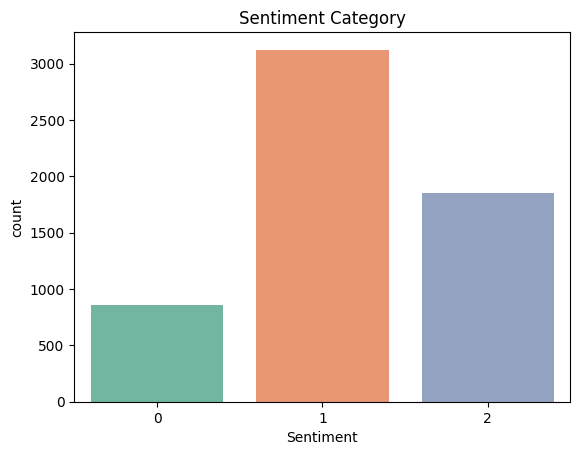

In [13]:
import seaborn as fsa_sn
import matplotlib.pyplot as fsa_mpl

fsa_sn.countplot(x ='Sentiment', data = fin_snt_ana, palette = 'Set2')
fsa_mpl.title('Sentiment Category')
fsa_mpl.show()

In [14]:
import nltk as fsa_nt_toki
fsa_nt_toki.download('stopwords')
import regex as fsa_rgr_ep
from nltk.corpus import stopwords as fsa_cos_spw
fsa_cos_spw = fsa_cos_spw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
fsa_nt_toki.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer as fsa_wordnet
fsa_lemmatizer = fsa_wordnet()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
def snti_ctg(fut):
    fut = fut.lower()
    fut = fsa_rgr_ep.sub("[^a-z]+", " ", fut)
    fut = " ".join([futd for futd in fut.split() if futd not in fsa_cos_spw])
    fut=' '.join([fsa_lemmatizer.lemmatize(j) for j in fut.split()])
    return fut

In [17]:
fin_snt_an_stp=[]
for ohg in fin_snt_ana['Sentence']:
    fin_snt_an_stp.append(snti_ctg(ohg))

In [18]:
fin_snt_ana['Sentence']=fin_snt_an_stp
fin_snt_ana

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,esi low bk real possibility,0
2,last quarter componenta net sale doubled eur e...,2
3,according finnish russian chamber commerce maj...,1
4,swedish buyout firm sold remaining percent sta...,1
...,...,...
5837,rising cost forced packaging producer huhtamak...,0
5838,nordic walking first used summer training meth...,1
5839,according shipping company viking line eu deci...,1
5840,building home improvement trade sale decreased...,1


In [19]:
fin_snt_ana.to_csv('/content/drive/MyDrive/Datasets/fsa_preprocessed_data.csv', index = False)

In [20]:
fin_snt_ana = fsa_pds_an.read_csv('/content/drive/MyDrive/Datasets/fsa_preprocessed_data.csv')

In [21]:
fin_snt_ana

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,esi low bk real possibility,0
2,last quarter componenta net sale doubled eur e...,2
3,according finnish russian chamber commerce maj...,1
4,swedish buyout firm sold remaining percent sta...,1
...,...,...
5831,rising cost forced packaging producer huhtamak...,0
5832,nordic walking first used summer training meth...,1
5833,according shipping company viking line eu deci...,1
5834,building home improvement trade sale decreased...,1


In [22]:
fin_snt_Ipt = fin_snt_ana.drop('Sentiment',axis=1)
fin_snt_Opt = fin_snt_ana['Sentiment']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer as fin_snt_tfdvc

fsa_vecmod = fin_snt_tfdvc(analyzer='word', ngram_range= (1,1))
fin_snt_Ipt = fsa_vecmod.fit_transform(fin_snt_ana['Sentence'].values.astype('U')).toarray()

In [24]:
import imblearn
from imblearn.over_sampling import RandomOverSampler as fin_snt_ovrmp
from collections import Counter as fin_snt_cntr

fin_snt_Opt = fin_snt_ana['Sentiment']

print('Actual Data   :  %s' % fin_snt_cntr(fin_snt_Opt))
fsa_ovrmod = fin_snt_ovrmp()
fin_snt_Ipt, fin_snt_Opt = fsa_ovrmod.fit_resample(fin_snt_Ipt, fin_snt_Opt)
print('Balanced Data : %s' % fin_snt_cntr(fin_snt_Opt))

Actual Data   :  Counter({1: 3124, 2: 1852, 0: 860})
Balanced Data : Counter({2: 3124, 0: 3124, 1: 3124})


In [25]:
from sklearn.model_selection import train_test_split as fin_snt_trts_spt

fin_snt_Xtrai, fin_snt_Xts, fin_snt_Ytrai, fin_snt_Yts = fin_snt_trts_spt(fin_snt_Ipt, fin_snt_Opt, test_size=0.4, random_state= 40)
fin_snt_Xvad, fin_snt_Xts, fin_snt_Yvad, fin_snt_Yts = fin_snt_trts_spt(fin_snt_Xts, fin_snt_Yts, test_size= 0.5, random_state= 40)

In [26]:
from sklearn.metrics import confusion_matrix as fin_snt_cnfm
from sklearn.metrics import ConfusionMatrixDisplay as fin_snt_dply
from sklearn.metrics import classification_report as fin_snt_rpot
from sklearn.model_selection import GridSearchCV as fin_snt_gid_sh
import matplotlib.pyplot as fin_snt_maplt
import numpy as fin_snt_nmpy
import warnings as fin_snt_wgni
fin_snt_wgni.filterwarnings("ignore")

In [27]:
from sklearn.ensemble import RandomForestClassifier as fin_snt_rdfst

fsa_prmtrs = {'n_estimators': [100, 20, 80],
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [3, 7, 9]}

fsa_modl = fin_snt_rdfst(random_state= 40)

fin_snt_gidsh = fin_snt_gid_sh(fsa_modl, fsa_prmtrs, cv=2, verbose=15)

fin_snt_gidsh.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print("\nRandom Forest Parameters selected by Grid Search :")
print(fin_snt_gidsh.best_params_)
print("\nRandom Forest Score: ", fin_snt_gidsh.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 1/2; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.526 total time=   1.2s
[CV 2/2; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 2/2; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.528 total time=   1.4s
[CV 1/2; 2/18] START criterion=gini, max_depth=3, n_estimators=20...............
[CV 1/2; 2/18] END criterion=gini, max_depth=3, n_estimators=20;, score=0.484 total time=   0.6s
[CV 2/2; 2/18] START criterion=gini, max_depth=3, n_estimators=20...............
[CV 2/2; 2/18] END criterion=gini, max_depth=3, n_estimators=20;, score=0.486 total time=   0.6s
[CV 1/2; 3/18] START criterion=gini, max_depth=3, n_estimators=80...............
[CV 1/2; 3/18] END criterion=gini, max_depth=3, n_estimators=80;, score=0.534 total time=   1.4s
[CV 2/2; 3/18] START criterion=gini, max_depth=

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       642
           1       0.49      0.81      0.61       614
           2       0.89      0.43      0.58       618

    accuracy                           0.61      1874
   macro avg       0.68      0.61      0.61      1874
weighted avg       0.69      0.61      0.61      1874



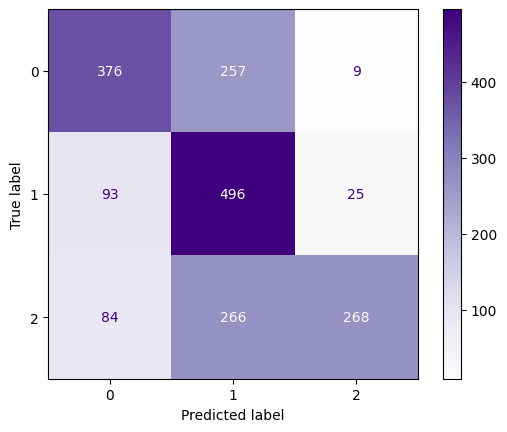

In [28]:

fsa_modl = fin_snt_rdfst(**fin_snt_gidsh.best_params_)
fsa_modl.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_y_pdct = fsa_modl.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       608
           1       0.50      0.82      0.62       610
           2       0.88      0.45      0.59       657

    accuracy                           0.62      1875
   macro avg       0.69      0.63      0.62      1875
weighted avg       0.70      0.62      0.62      1875



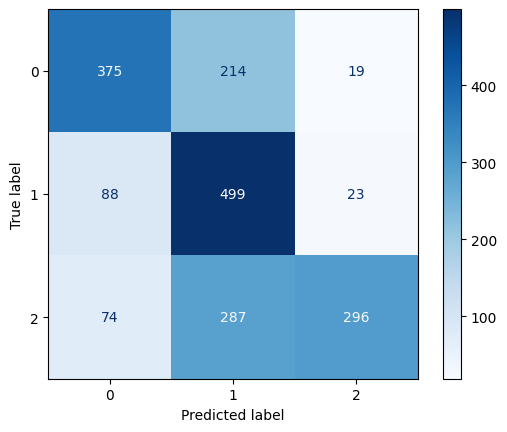

In [29]:

fsa_y_pdct = fsa_modl.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [30]:
from sklearn.naive_bayes import CategoricalNB as fin_snt_cnavb

fin_snt_prmts_gd = {
    'alpha': [1, 5,7,9],
    'fit_prior': [True, False]
}


fin_snt_cnavb_cl = fin_snt_cnavb()


fin_snt_gidsh = fin_snt_gid_sh(fin_snt_cnavb_cl, fin_snt_prmts_gd, cv=5, verbose=10)


fin_snt_gidsh.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print("\nCategorical Naive Bayes Parameters selected by Grid Search :")
print(fin_snt_gidsh.best_params_)
print("Best score:", fin_snt_gidsh.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START alpha=1, fit_prior=True.....................................
[CV 1/5; 1/8] END ......alpha=1, fit_prior=True;, score=0.338 total time=   3.2s
[CV 2/5; 1/8] START alpha=1, fit_prior=True.....................................
[CV 2/5; 1/8] END ........alpha=1, fit_prior=True;, score=nan total time=   2.7s
[CV 3/5; 1/8] START alpha=1, fit_prior=True.....................................
[CV 3/5; 1/8] END ........alpha=1, fit_prior=True;, score=nan total time=   3.5s
[CV 4/5; 1/8] START alpha=1, fit_prior=True.....................................
[CV 4/5; 1/8] END ......alpha=1, fit_prior=True;, score=0.338 total time=   4.2s
[CV 5/5; 1/8] START alpha=1, fit_prior=True.....................................
[CV 5/5; 1/8] END ......alpha=1, fit_prior=True;, score=0.338 total time=   3.3s
[CV 1/5; 2/8] START alpha=1, fit_prior=False....................................
[CV 1/5; 2/8] END .....alpha=1, fit_prior=False;,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       642
           1       0.33      1.00      0.49       614
           2       0.00      0.00      0.00       618

    accuracy                           0.33      1874
   macro avg       0.11      0.33      0.16      1874
weighted avg       0.11      0.33      0.16      1874



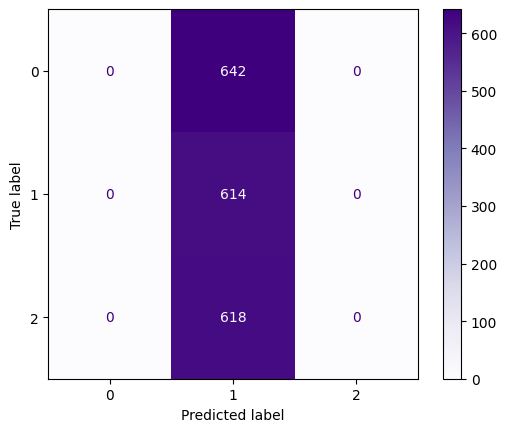

In [31]:

fsa_modl = fin_snt_cnavb(**fin_snt_gidsh.best_params_)
fsa_modl.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fin_snt_lgbos_mdl = fin_snt_nmpy.clip(fin_snt_Xvad, 0, fsa_modl.n_categories_ - 1)

fsa_y_pdct = fsa_modl.predict(fin_snt_lgbos_mdl)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       608
           1       0.33      1.00      0.49       610
           2       1.00      0.00      0.00       657

    accuracy                           0.33      1875
   macro avg       0.44      0.33      0.16      1875
weighted avg       0.46      0.33      0.16      1875



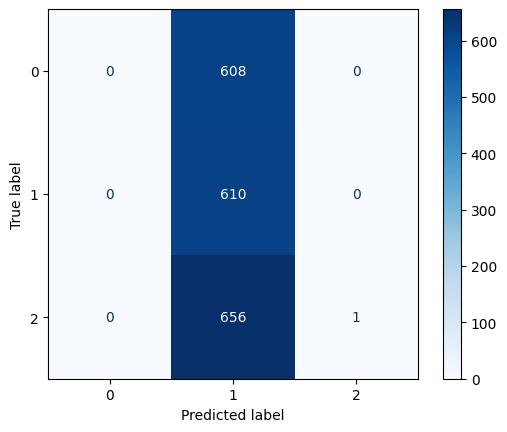

In [32]:
fin_snt_Xts_clipped = fin_snt_nmpy.clip(fin_snt_Xts, 0, fsa_modl.n_categories_ - 1)

fsa_y_pdct = fsa_modl.predict(fin_snt_Xts_clipped)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [33]:
import lightgbm as fin_snt_lgbos

fin_snt_prmts_gd = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

fin_snt_lgbos_mdl = fin_snt_lgbos.LGBMClassifier()


fin_snt_gidsh = fin_snt_gid_sh(fin_snt_lgbos_mdl, fin_snt_prmts_gd, cv=5, verbose=15)


fin_snt_gidsh.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print("\nLightGBM Parameters selected by Grid Search :")
print(fin_snt_gidsh.best_params_)
print("Best score:", fin_snt_gidsh.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Start training from score -1.112267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10636
[LightGBM] [Info] Number of data points in the train set: 5623, number of used features: 555
[LightGBM] [Info] Start training from score -1.098790
[LightGBM] [Info] Start training from score -1.085011
[LightGBM] [Info] Start training from score -1.112220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

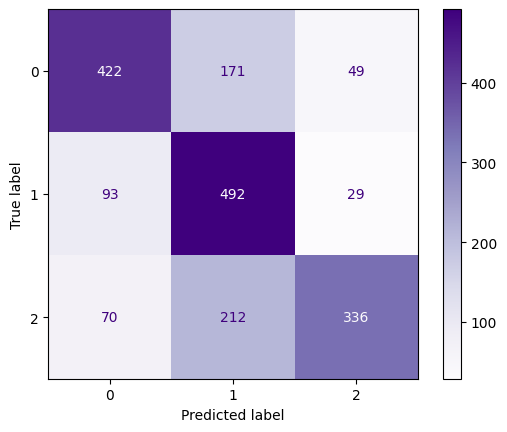

In [34]:

fsa_modl = fin_snt_lgbos.LGBMClassifier(**fin_snt_gidsh.best_params_)
fsa_modl.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_modl.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       608
           1       0.57      0.79      0.66       610
           2       0.80      0.55      0.65       657

    accuracy                           0.67      1875
   macro avg       0.70      0.67      0.67      1875
weighted avg       0.70      0.67      0.67      1875



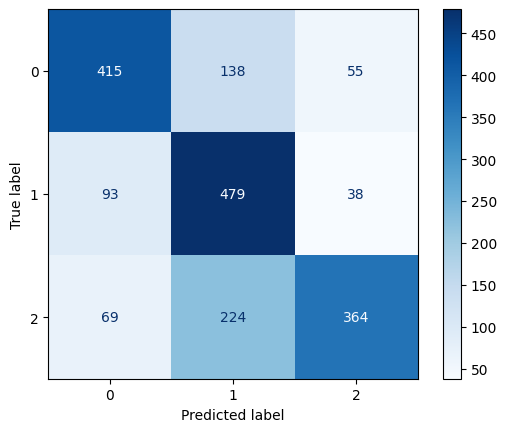

In [35]:

fsa_y_pdct = fsa_modl.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier as fin_snt_knea

fin_snt_prmts_gd = {
    'n_neighbors': [3, 5],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

fin_snt_knea_mdl = fin_snt_knea()


fin_snt_gidsh = fin_snt_gid_sh(fin_snt_knea_mdl, fin_snt_prmts_gd, cv=5, verbose=15)


fin_snt_gidsh.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print("\nLight Boost Parameters selected by Grid Search :")
print("Best parameters:", fin_snt_gidsh.best_params_)
print("Best score:", fin_snt_gidsh.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START metric=euclidean, n_neighbors=3, weights=uniform............
[CV 1/5; 1/2] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.693 total time=   4.3s
[CV 2/5; 1/2] START metric=euclidean, n_neighbors=3, weights=uniform............
[CV 2/5; 1/2] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.649 total time=   3.2s
[CV 3/5; 1/2] START metric=euclidean, n_neighbors=3, weights=uniform............
[CV 3/5; 1/2] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.665 total time=   3.2s
[CV 4/5; 1/2] START metric=euclidean, n_neighbors=3, weights=uniform............
[CV 4/5; 1/2] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.665 total time=   4.0s
[CV 5/5; 1/2] START metric=euclidean, n_neighbors=3, weights=uniform............
[CV 5/5; 1/2] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.649 total time=   4.4s
[CV 1/5; 2/2] START metric=euclidea

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       642
           1       0.68      0.55      0.61       614
           2       0.75      0.67      0.70       618

    accuracy                           0.68      1874
   macro avg       0.69      0.68      0.68      1874
weighted avg       0.69      0.68      0.68      1874



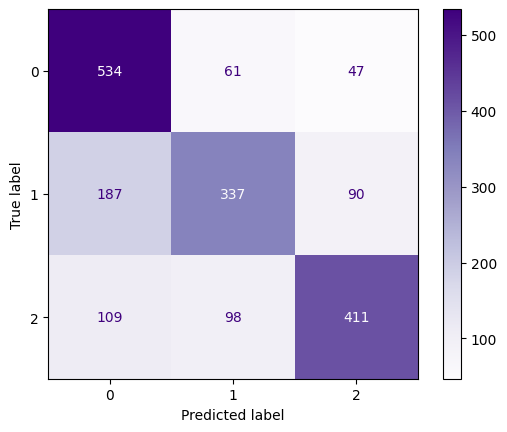

In [37]:

fsa_modl = fin_snt_knea(**fin_snt_gidsh.best_params_)
fsa_modl.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_modl.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.64      0.86      0.74       608
           1       0.68      0.55      0.61       610
           2       0.74      0.64      0.69       657

    accuracy                           0.68      1875
   macro avg       0.69      0.68      0.68      1875
weighted avg       0.69      0.68      0.68      1875



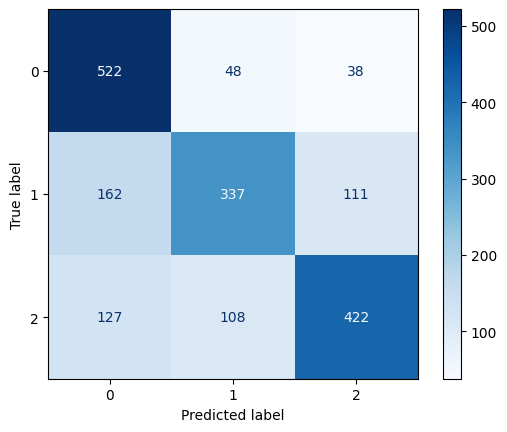

In [38]:

fsa_y_pdct = fsa_modl.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [39]:
from sklearn.neural_network import MLPClassifier as fin_snt_mulinp

fin_snt_prmts_gd = {
    'hidden_layer_sizes': [(50, 50)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.01]
}

fin_snt_muli = fin_snt_mulinp()


fin_snt_gidsh = fin_snt_gid_sh(fin_snt_muli, fin_snt_prmts_gd, cv=5, verbose=15)


fin_snt_gidsh.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print("\nMLPClassifier Parameters selected by Grid Search :")
print("Best parameters:", fin_snt_gidsh.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam
[CV 1/5; 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam;, score=0.788 total time= 2.9min
[CV 2/5; 1/4] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam
[CV 2/5; 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam;, score=0.745 total time= 2.0min
[CV 3/5; 1/4] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam
[CV 3/5; 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam;, score=0.736 total time= 2.4min
[CV 4/5; 1/4] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam
[CV 4/5; 1/4] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=adam;, score=0.768 total time= 1.7min
[CV 5/5; 1/4] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), solver=ad

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       642
           1       0.77      0.68      0.72       614
           2       0.83      0.81      0.82       618

    accuracy                           0.80      1874
   macro avg       0.79      0.79      0.79      1874
weighted avg       0.80      0.80      0.79      1874



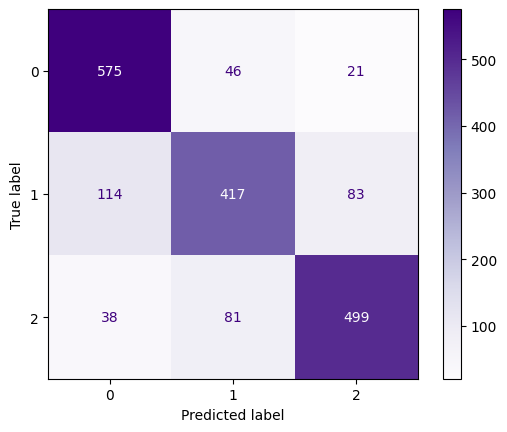

In [40]:

fsa_modl = fin_snt_mulinp(**fin_snt_gidsh.best_params_)
fsa_modl.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_modl.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       608
           1       0.74      0.67      0.70       610
           2       0.83      0.80      0.81       657

    accuracy                           0.79      1875
   macro avg       0.79      0.79      0.79      1875
weighted avg       0.79      0.79      0.79      1875



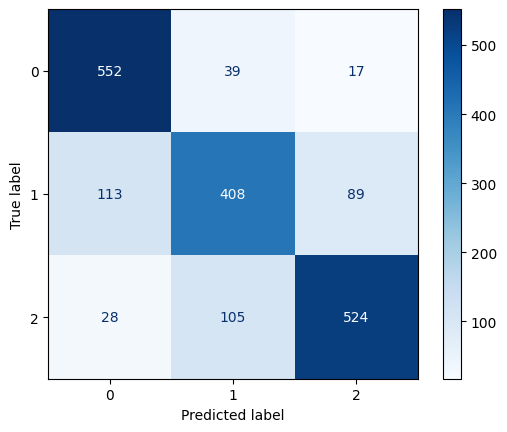

In [41]:

fsa_y_pdct = fsa_modl.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [42]:
fin_snt_ana = fsa_pds_an.read_csv('/content/drive/MyDrive/Datasets/fsa_preprocessed_data.csv')

In [43]:
fin_snt_ana

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,2
1,esi low bk real possibility,0
2,last quarter componenta net sale doubled eur e...,2
3,according finnish russian chamber commerce maj...,1
4,swedish buyout firm sold remaining percent sta...,1
...,...,...
5831,rising cost forced packaging producer huhtamak...,0
5832,nordic walking first used summer training meth...,1
5833,according shipping company viking line eu deci...,1
5834,building home improvement trade sale decreased...,1


In [44]:
fin_snt_ana.shape

(5836, 2)

In [45]:
fin_snt_Ipt = fin_snt_ana.drop('Sentiment',axis=1)
fin_snt_Opt = fin_snt_ana['Sentiment']

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer as fin_snt_tfdvc

fsa_vecmod = fin_snt_tfdvc(analyzer='word', ngram_range= (1,1))
fin_snt_Ipt = fsa_vecmod.fit_transform(fin_snt_ana['Sentence'].values.astype('U')).toarray()

In [47]:

import imblearn
from imblearn.over_sampling import RandomOverSampler as fin_snt_ovrmp
from collections import Counter as fin_snt_cntr

fin_snt_Opt = fin_snt_ana['Sentiment']

print('Actual Data   :  %s' % fin_snt_cntr(fin_snt_Opt))
fsa_ovrmod = fin_snt_ovrmp()
fin_snt_Ipt, fin_snt_Opt = fsa_ovrmod.fit_resample(fin_snt_Ipt, fin_snt_Opt)
print('Balanced Data : %s' % fin_snt_cntr(fin_snt_Opt))

Actual Data   :  Counter({1: 3124, 2: 1852, 0: 860})
Balanced Data : Counter({2: 3124, 0: 3124, 1: 3124})


In [48]:
from sklearn.model_selection import train_test_split as fin_snt_trts_spt

fin_snt_Xtrai, fin_snt_Xts, fin_snt_Ytrai, fin_snt_Yts = fin_snt_trts_spt(fin_snt_Ipt, fin_snt_Opt, test_size=0.4, random_state= 40)
fin_snt_Xvad, fin_snt_Xts, fin_snt_Yvad, fin_snt_Yts = fin_snt_trts_spt(fin_snt_Xts, fin_snt_Yts, test_size= 0.5, random_state= 40)

In [49]:
print("\nTraining Shape    :", fin_snt_Xtrai.shape)
print("\nValidation Shape  :", fin_snt_Xvad.shape)
print("\nTesting Shape     :", fin_snt_Xts.shape)


Training Shape    : (5623, 9298)

Validation Shape  : (1874, 9298)

Testing Shape     : (1875, 9298)


In [50]:
from sklearn.metrics import confusion_matrix as fin_snt_cnfm
from sklearn.metrics import ConfusionMatrixDisplay as fin_snt_dply
from sklearn.metrics import classification_report as fin_snt_rpot
from sklearn.model_selection import GridSearchCV as fin_snt_gid_sh
from sklearn.ensemble import VotingClassifier as fsa_VtgCr
import matplotlib.pyplot as fin_snt_maplt
import warnings as fin_snt_wgni
fin_snt_wgni.filterwarnings("ignore")

In [51]:
from sklearn.neural_network import MLPClassifier as fsa_mlp
from sklearn.neighbors import KNeighborsClassifier as fsa_KNC

fsa_hr = {'voting': ['hard', 'soft']}

KNC_prms = {'algorithm': ['auto'], 'n_neighbors': [9], 'p': [1], 'weights': ['distance']}
fsa_param_grid = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}

fsa_mlpmod = fsa_mlp()
fsa_KNCmod = fsa_KNC()

fsa_MLPGrid = fin_snt_gid_sh(fsa_mlpmod, fsa_param_grid, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_KNCGrid = fin_snt_gid_sh(fsa_KNCmod, KNC_prms, cv=2, verbose=1)
fsa_KNCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_VotMod = fsa_VtgCr(estimators=[('KNC', fsa_KNCGrid.best_estimator_), ('MLP', fsa_MLPGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining KNN and MLP Classifier: ", fsa_VotMod.best_score_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'soft'}
GSCV score - Combining KNN and MLP Classifier:  0.7188342080214236


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       642
           1       0.72      0.71      0.71       614
           2       0.85      0.77      0.81       618

    accuracy                           0.79      1874
   macro avg       0.79      0.79      0.79      1874
weighted avg       0.79      0.79      0.79      1874



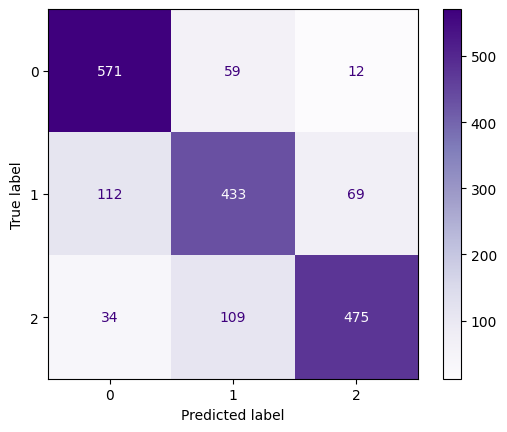

In [52]:
fsa_VotModtr = fsa_VtgCr(estimators=[('KNN', fsa_KNCGrid.best_estimator_), ('MLP', fsa_MLPGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       608
           1       0.75      0.74      0.75       610
           2       0.91      0.81      0.86       657

    accuracy                           0.82      1875
   macro avg       0.82      0.82      0.82      1875
weighted avg       0.82      0.82      0.82      1875



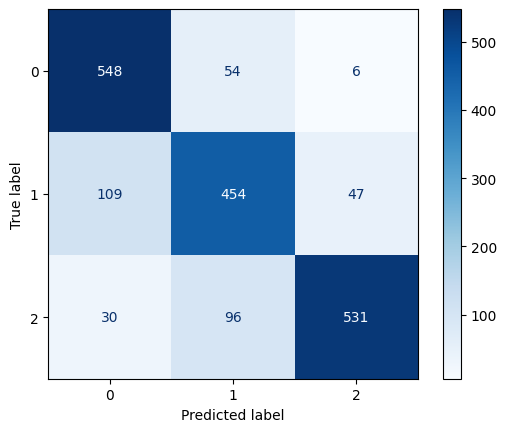

In [70]:
fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier as fin_snt_rdms
from sklearn.neural_network import MLPClassifier as fsa_mlp

fsa_hr = {'voting': ['hard', 'soft']}

fsa_param_grid = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}
rf_prms = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_leaf': [3], 'min_samples_split': [2]}

fin_snt_rdmsmod = fin_snt_rdms()
mlp_fsa = fsa_mlp()

fin_snt_rdmsCGrid = fin_snt_gid_sh(fin_snt_rdmsmod, rf_prms, cv=2, verbose=1)
fin_snt_rdmsCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_MLPGrid = fin_snt_gid_sh(mlp_fsa, fsa_param_grid, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_VotMod = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining MLP and Random Forest Classifier: ", fsa_VotMod.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'soft'}
GSCV score - Combining MLP and Random Forest Classifier:  0.7158104995969401


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       642
           1       0.71      0.70      0.70       614
           2       0.86      0.76      0.81       618

    accuracy                           0.78      1874
   macro avg       0.78      0.78      0.78      1874
weighted avg       0.78      0.78      0.78      1874



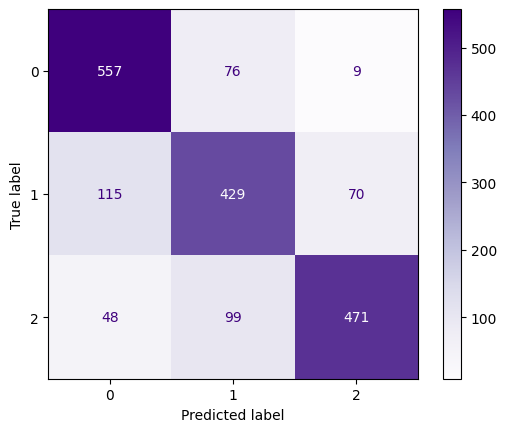

In [71]:
fsa_VotModtr = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       608
           1       0.72      0.71      0.71       610
           2       0.88      0.79      0.84       657

    accuracy                           0.79      1875
   macro avg       0.79      0.79      0.79      1875
weighted avg       0.80      0.79      0.79      1875



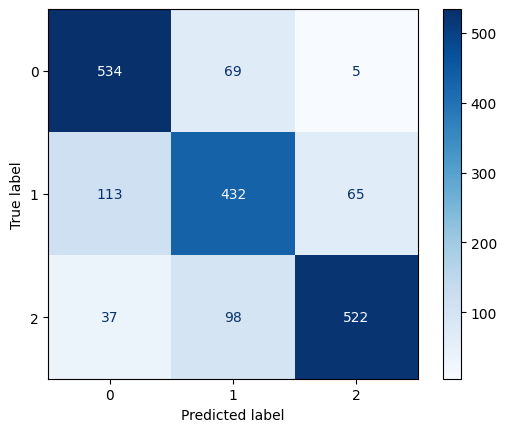

In [72]:

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [57]:
import lightgbm as fsa_lgb
from sklearn.neural_network import MLPClassifier as fsa_mlp

fsa_hr = {'voting': ['hard', 'soft']}

fsa_param_grid = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}
fsa_param_grid_lgb = {'learning_rate': [0.01, 0.1],'n_estimators': [50, 100],'max_depth': [3, 5]}

fsa_lgbmod = fsa_lgb.LGBMClassifier()
mlp_fsa = fsa_mlp()

fsa_LGBMGrid = fin_snt_gid_sh(fsa_lgbmod, fsa_param_grid_lgb, cv=2, verbose=1)
fsa_LGBMGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_MLPGrid = fin_snt_gid_sh(mlp_fsa, fsa_param_grid, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_VotMod = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('LGBM', fsa_LGBMGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining MLP and LGBM Classifier: ", fsa_VotMod.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10797
[LightGBM] [Info] Number of data points in the train set: 5623, number of used features: 572
[LightGBM] [Info] Start training from score -1.098790
[LightGBM] [Info] Start training from score -1.085011
[LightGBM] [Info] Start training from score -1.112220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

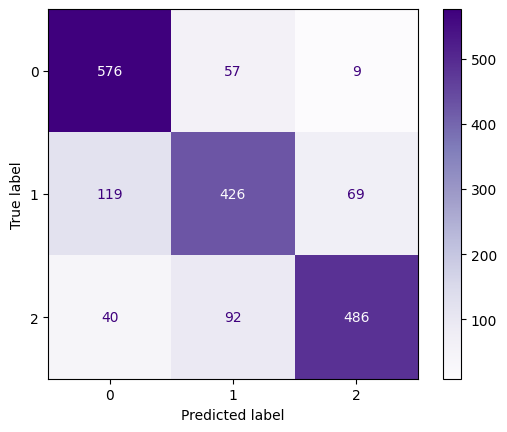

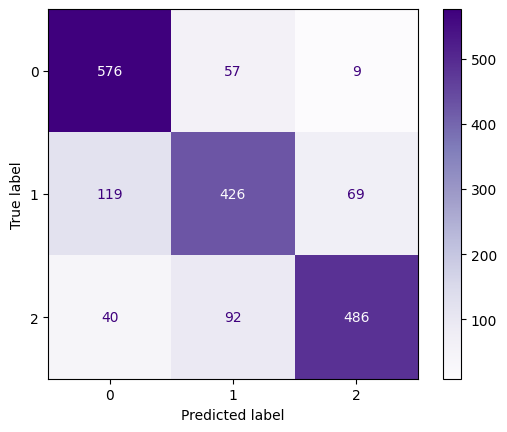

In [58]:

fsa_VotModtr = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('LGBM', fsa_LGBMGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       608
           1       0.77      0.71      0.74       610
           2       0.88      0.81      0.84       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.81      1875
weighted avg       0.81      0.81      0.81      1875



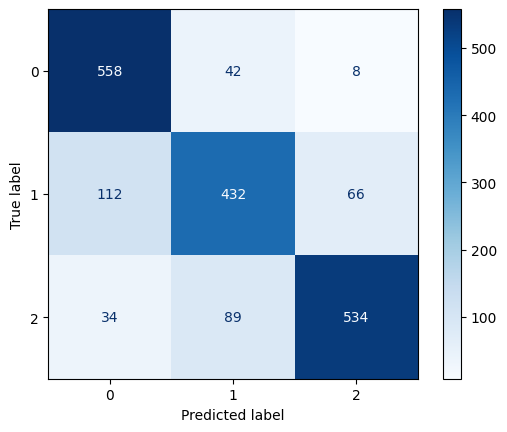

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       608
           1       0.77      0.71      0.74       610
           2       0.88      0.81      0.84       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.81      1875
weighted avg       0.81      0.81      0.81      1875



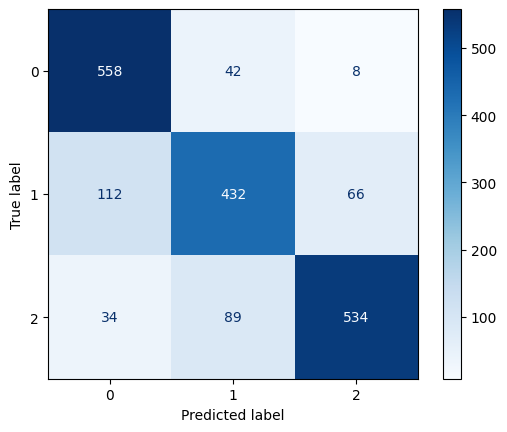

In [59]:

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier as fin_snt_rdms
from sklearn.neural_network import MLPClassifier as fsa_mlp
from sklearn.neighbors import KNeighborsClassifier as fsa_KNC

fsa_hr = {'voting': ['hard', 'soft']}

KNC_prms = {'algorithm': ['auto'], 'n_neighbors': [9], 'p': [1], 'weights': ['distance']}
fsa_param_grid = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}
rf_prms = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_leaf': [3], 'min_samples_split': [2]}

fin_snt_rdmsmod = fin_snt_rdms()
fsa_kncmod = fsa_KNC()
mlp_fsa = fsa_mlp()

fin_snt_rdmsCGrid = fin_snt_gid_sh(fin_snt_rdmsmod, rf_prms, cv=2, verbose=1)
fin_snt_rdmsCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_MLPGrid = fin_snt_gid_sh(mlp_fsa, fsa_param_grid, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_KNCGrid = fin_snt_gid_sh(fsa_kncmod, KNC_prms, cv=2, verbose=1)
fsa_KNCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_VotMod = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_), ('KNC', fsa_KNCGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining MLP, KNN and Random Forest Classifier: ", fsa_VotMod.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'soft'}
GSCV score - Combining MLP, KNN and Random Forest Classifier:  0.7159888150240901
{'voting': 'soft'}
GSCV score - Combining MLP, KNN and Random Forest Classifier:  0.7159888150240901


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       642
           1       0.75      0.69      0.72       614
           2       0.85      0.77      0.81       618

    accuracy                           0.79      1874
   macro avg       0.79      0.79      0.79      1874
weighted avg       0.79      0.79      0.79      1874

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       642
           1       0.75      0.69      0.72       614
           2       0.85      0.77      0.81       618

    accuracy                           0.79      1874
   macro avg       0.79      0.79      0.79      1874
weighted avg       0.79      0.79      0.79      1874



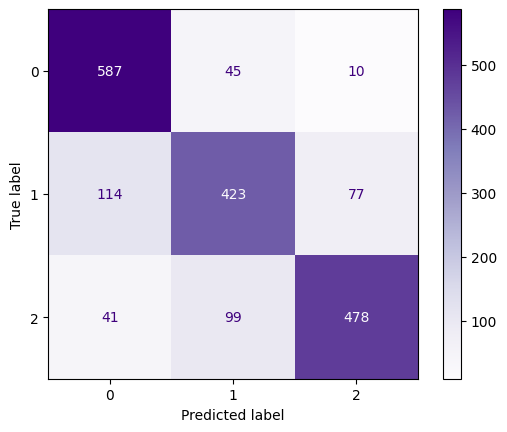

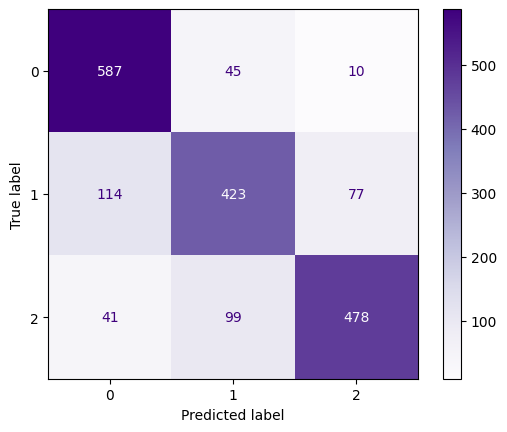

In [61]:

fsa_VotModtr = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_), ('KNC', fsa_MLPGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       608
           1       0.76      0.69      0.73       610
           2       0.87      0.81      0.84       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.80      1875
weighted avg       0.81      0.81      0.81      1875

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       608
           1       0.76      0.69      0.73       610
           2       0.87      0.81      0.84       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.80      1875
weighted avg       0.81      0.81      0.81      1875



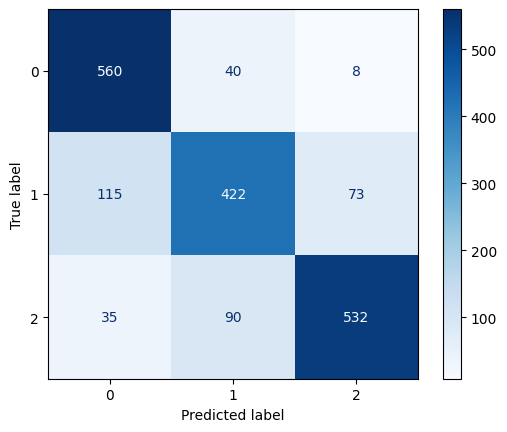

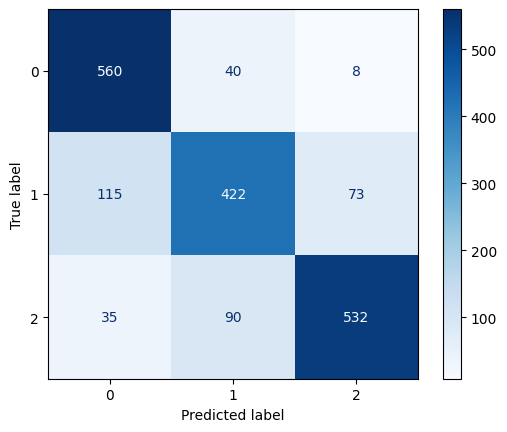

In [62]:

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier as fin_snt_rdms
from lightgbm import LGBMClassifier as fsa_lgbm
from sklearn.neural_network import MLPClassifier as fsa_mlp

fsa_hr = {'voting': ['hard', 'soft']}

MLP_prms = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}
fsa_param_grid = {'learning_rate': [0.01, 0.1],'n_estimators': [50, 100],'max_depth': [3, 5]}
rf_prms = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_leaf': [3], 'min_samples_split': [2]}

fin_snt_rdmsmod = fin_snt_rdms()
fsa_mlpmod = fsa_mlp()
lgb_fsa = fsa_lgbm()

fin_snt_rdmsCGrid = fin_snt_gid_sh(fin_snt_rdmsmod, rf_prms, cv=2, verbose=1)
fin_snt_rdmsCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_LGBMGrid = fin_snt_gid_sh(lgb_fsa, fsa_param_grid, cv=2, verbose=1)
fsa_LGBMGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_MLPGrid = fin_snt_gid_sh(fsa_mlpmod, MLP_prms, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_VotMod = fsa_VtgCr(estimators=[('LGBM', fsa_LGBMGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_), ('MLP', fsa_MLPGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining LightGBM, MLP and Random Forest Classifier: ", fsa_VotMod.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10797
[LightGBM] [Info] Number of data points in the train set: 5623, number of used features: 572
[LightGBM] [Info] Start training from score -1.098790
[LightGBM] [Info] Start training from score -1.085011
[LightGBM] [Info] Start training from score -1.112220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

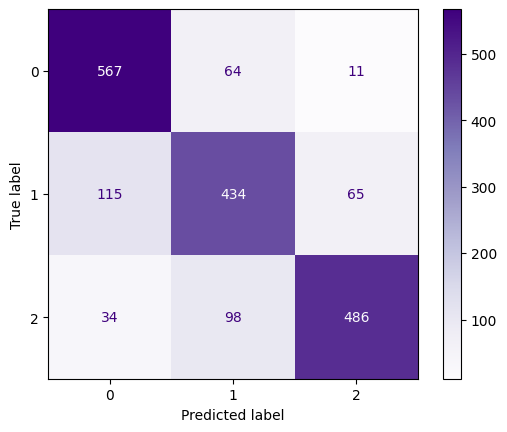

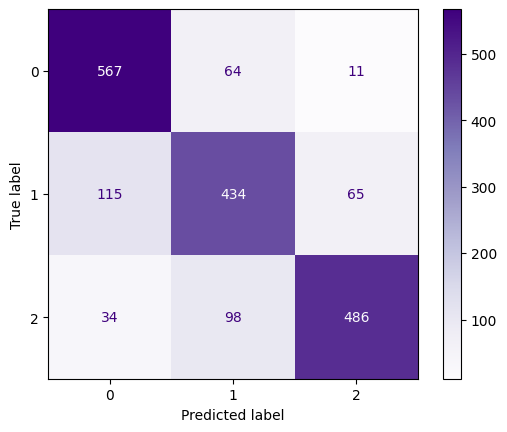

In [64]:

fsa_VotModtr = fsa_VtgCr(estimators=[('LGBM', fsa_LGBMGrid.best_estimator_), ('RFC', fin_snt_rdmsCGrid.best_estimator_), ('MLP', fsa_MLPGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       608
           1       0.76      0.72      0.74       610
           2       0.88      0.82      0.85       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.81      1875
weighted avg       0.81      0.81      0.81      1875

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       608
           1       0.76      0.72      0.74       610
           2       0.88      0.82      0.85       657

    accuracy                           0.81      1875
   macro avg       0.81      0.81      0.81      1875
weighted avg       0.81      0.81      0.81      1875



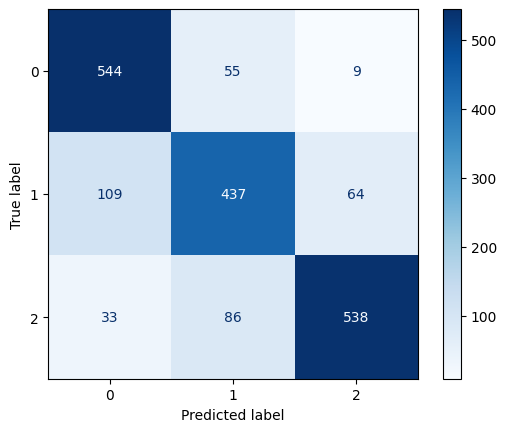

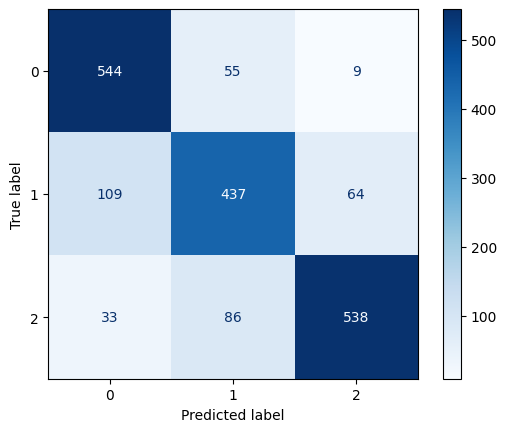

In [65]:

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()

In [66]:
from lightgbm import LGBMClassifier as fsa_lgbm
from sklearn.neural_network import MLPClassifier as fsa_mlp
from sklearn.neighbors import KNeighborsClassifier as fsa_KNC

fsa_hr = {'voting': ['hard', 'soft']}

KNC_prms = {'algorithm': ['auto'], 'n_neighbors': [9], 'p': [1], 'weights': ['distance']}
lgbm_param_grid = {'learning_rate': [0.01, 0.1],'n_estimators': [50, 100],'max_depth': [3, 5]}
fsa_param_grid = {'hidden_layer_sizes': [(50, 50)],'activation': ['relu'],'alpha': [0.001, 0.01]}

fin_snt_rdmsmod = fin_snt_rdms()
fsa_kncmod = fsa_KNC()
mlp_fsa = fsa_mlp()

fsa_LGBMGrid = fin_snt_gid_sh(lgb_fsa, lgbm_param_grid, cv=2, verbose=1)
fsa_LGBMGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_MLPGrid = fin_snt_gid_sh(mlp_fsa, fsa_param_grid, cv=2, verbose=1)
fsa_MLPGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_KNCGrid = fin_snt_gid_sh(fsa_kncmod, KNC_prms, cv=2, verbose=1)
fsa_KNCGrid.fit(fin_snt_Xtrai, fin_snt_Ytrai)

fsa_VotMod = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('LGBM', fsa_LGBMGrid.best_estimator_), ('KNC', fsa_KNCGrid.best_estimator_)])

fsa_VotMod = fin_snt_gid_sh(fsa_VotMod, fsa_hr, cv=2, verbose=1)
fsa_VotMod.fit(fin_snt_Xtrai, fin_snt_Ytrai)

print(fsa_VotMod.best_params_)
print("GSCV score - Combining MLP, KNN and LGBM: ", fsa_VotMod.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10797
[LightGBM] [Info] Number of data points in the train set: 5623, number of used features: 572
[LightGBM] [Info] Start training from score -1.098790
[LightGBM] [Info] Start training from score -1.085011
[LightGBM] [Info] Start training from score -1.112220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

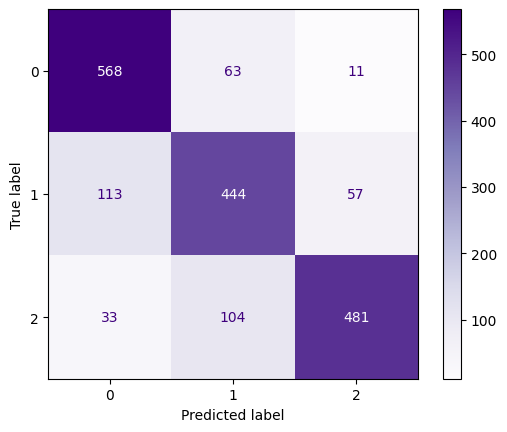

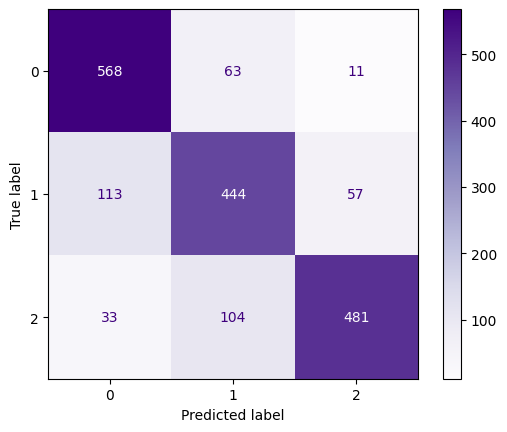

In [67]:

fsa_VotModtr = fsa_VtgCr(estimators=[('MLP', fsa_MLPGrid.best_estimator_), ('LGBM', fsa_LGBMGrid.best_estimator_), ('KNC', fsa_KNCGrid.best_estimator_)], voting='soft')
fsa_VotModtr.fit(fin_snt_Xtrai, fin_snt_Ytrai)


fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xvad)
print(fin_snt_rpot(fin_snt_Yvad, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yvad, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Purples')
fin_snt_maplt.show()

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       608
           1       0.75      0.74      0.75       610
           2       0.91      0.81      0.86       657

    accuracy                           0.82      1875
   macro avg       0.82      0.82      0.82      1875
weighted avg       0.82      0.82      0.82      1875

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       608
           1       0.75      0.74      0.75       610
           2       0.91      0.81      0.86       657

    accuracy                           0.82      1875
   macro avg       0.82      0.82      0.82      1875
weighted avg       0.82      0.82      0.82      1875



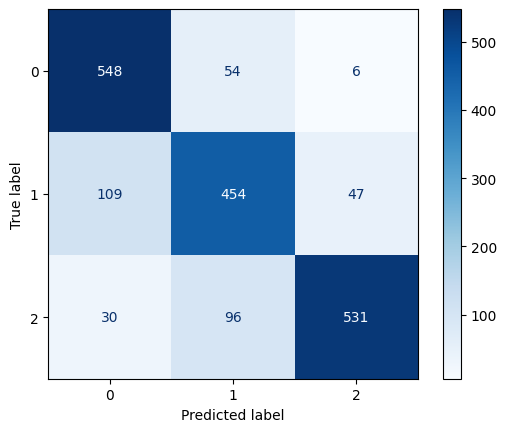

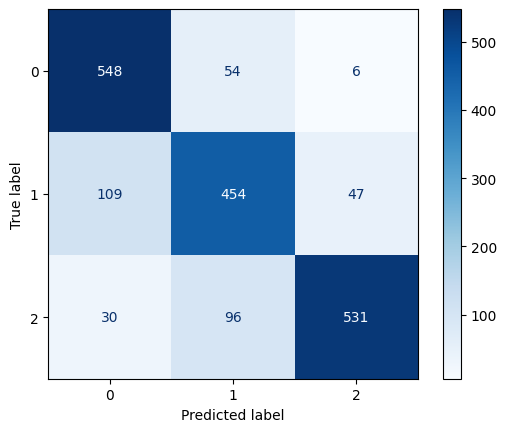

In [68]:

fsa_y_pdct = fsa_VotModtr.predict(fin_snt_Xts)
print(fin_snt_rpot(fin_snt_Yts, fsa_y_pdct))

fsa_confM = fin_snt_cnfm(fin_snt_Yts, fsa_y_pdct)
fin_snt_dply(confusion_matrix = fsa_confM, display_labels = [0, 1, 2]).plot(cmap = 'Blues')
fin_snt_maplt.show()